In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [2]:

# Fuzzy set operations and definitions
def fuzzy_union(A, B):
    return {x: max(A.get(x, 0), B.get(x, 0)) for x in set(A) | set(B)}

def fuzzy_intersection(A, B):
    return {x: min(A.get(x, 0), B.get(x, 0)) for x in set(A) & set(B)}

def fuzzy_complement(A):
    return {x: 1 - A[x] for x in A}

def fuzzy_difference(A, B):
    return {x: min(A.get(x, 0), 1 - B.get(x, 0)) for x in set(A)}

def cartesian_product(A, B):
    return {(x, y): min(A[x], B[y]) for x in A for y in B}

def max_min_composition(R, S):
    T = {}
    for (x, y1) in R:
        for (y2, z) in S:
            if y1 == y2:
                T[(x, z)] = max(T.get((x, z), 0), min(R[(x, y1)], S[(y2, z)]))
    return T


In [5]:

# Define sets
A = {'a': 0.5, 'b': 0.7, 'c': 0.2}
B = {'b': 0.6, 'c': 0.8, 'd': 0.4}

# Compute Cartesian product R
R = cartesian_product(A, B)


/var/folders/70/9wgnzfm56tx44byb0jjm6llr0000gn/T/ipykernel_8852/2721661950.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


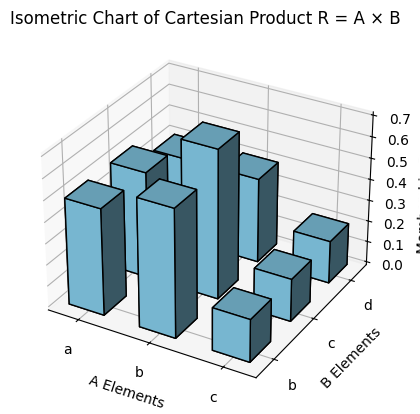

In [6]:

# Plotting the isometric chart
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_labels = list(A.keys())
y_labels = list(B.keys())

# Create coordinate grid
x_pos, y_pos, z_pos = [], [], []
dz = []

for i, x in enumerate(x_labels):
    for j, y in enumerate(y_labels):
        x_pos.append(i)
        y_pos.append(j)
        z_pos.append(0)
        dz.append(R[(x, y)])

# Bar width and depth
dx = dy = 0.5

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='skyblue', edgecolor='black')

# Label axes
ax.set_xticks(np.arange(len(x_labels)) + dx/2)
ax.set_xticklabels(x_labels)
ax.set_yticks(np.arange(len(y_labels)) + dy/2)
ax.set_yticklabels(y_labels)
ax.set_xlabel('A Elements')
ax.set_ylabel('B Elements')
ax.set_zlabel('Membership Degree')

ax.set_title('Isometric Chart of Cartesian Product R = A × B')

plt.tight_layout()
plt.show()

In [7]:
fuzzy_union(A, B)

{'c': 0.8, 'd': 0.4, 'b': 0.7, 'a': 0.5}

In [8]:
fuzzy_difference(A,B)

{'b': 0.4, 'c': 0.19999999999999996, 'a': 0.5}

In [9]:
fuzzy_complement(A)

{'a': 0.5, 'b': 0.30000000000000004, 'c': 0.8}

In [10]:
fuzzy_intersection(A,B)

{'b': 0.6, 'c': 0.2}

In [11]:
C = {'x': 0.3, 'y': 0.9, 'z': 0.5}


In [13]:
def min_max_composition(R, S):
    T = {}
    for (x, y1) in R:
        for (y2, z) in S:
            if y1 == y2:
                current = T.get((x, z), 1)
                T[(x, z)] = min(current, max(R[(x, y1)], S[(y2, z)]))
    return T


In [14]:
R = cartesian_product(A, B)  # A × B
S = cartesian_product(B, C)  # B × C
min_max = min_max_composition(R, S)


/var/folders/70/9wgnzfm56tx44byb0jjm6llr0000gn/T/ipykernel_8852/2193689023.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


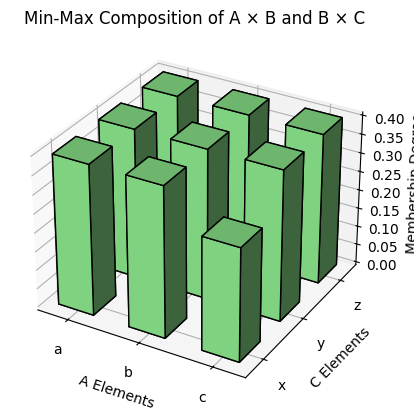

In [15]:

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_labels = list(A.keys())
z_labels = list(C.keys())

x_pos, y_pos, z_pos = [], [], []
dz = []

for i, x in enumerate(x_labels):
    for j, z in enumerate(z_labels):
        val = min_max.get((x, z), 0)
        x_pos.append(i)
        y_pos.append(j)
        z_pos.append(0)
        dz.append(val)

dx = dy = 0.5

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='lightgreen', edgecolor='black')

# Label axes
ax.set_xticks(np.arange(len(x_labels)) + dx/2)
ax.set_xticklabels(x_labels)
ax.set_yticks(np.arange(len(z_labels)) + dy/2)
ax.set_yticklabels(z_labels)
ax.set_xlabel('A Elements')
ax.set_ylabel('C Elements')
ax.set_zlabel('Membership Degree')

ax.set_title('Min-Max Composition of A × B and B × C')

plt.tight_layout()
plt.show()